# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

# Gathering and Observing Data

In [2]:
main_df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
main_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
print(f'Shape of data: {main_df.shape}\nNumber of Columns: {len(main_df.columns)}\nSize of Dataset: {main_df.size}')

Shape of data: (34857, 21)
Number of Columns: 21
Size of Dataset: 731997


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Split NaN Price values for prediction

In [5]:
test_df = main_df[main_df.Price.isna()]
main_df = main_df.drop(main_df[main_df.Price.isna()].index)

# Exploratory Data Analysis

Descriptive statistics of dataset

In [6]:
main_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


Clear duplicate data

In [7]:
main_df = main_df.drop_duplicates(subset=[i for i in main_df.columns if i != 'Price'])

In [8]:
copy_df = main_df.copy()

Split address [85 Turner St] => ['Turner', 'St']

In [9]:
def split_address(df):
  words = df.Address.str.split()
  AddressName = []
  AddressType = []
  for word in words:
    AddressName.append(' '.join(word[1:-1]))
    AddressType.append(' '.join(word[-1:]))
  df['AddressName'] = AddressName
  df['AddressType'] = AddressType
  df = df.drop('Address', axis=1)
  return df

ft_split_address = FunctionTransformer(split_address)

In [10]:
copy_df = split_address(copy_df)
copy_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,AddressName,AddressType
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Turner,St
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Bloomburg,St
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Charles,St
5,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,Federation,La
6,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,Park,St


Split date as day, month, year

In [11]:
def split_date(df):
  df[['SoldDay', 'SoldMonth', 'SoldYear']] = df.Date.str.split('/', expand=True).astype(int)
  df = df.drop('Date', axis=1)
  return df

ft_split_date = FunctionTransformer(split_date)

In [12]:
copy_df = split_date(copy_df)
copy_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,AddressName,AddressType,SoldDay,SoldMonth,SoldYear
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Turner,St,3,12,2016
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Bloomburg,St,4,2,2016
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Charles,St,4,3,2017
5,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,...,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,Federation,La,4,3,2017
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,...,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,Park,St,4,6,2016


Transform 'object' types to 'category'

In [13]:
def to_categorical(df):
  for i in df.columns:
    df[i] = pd.Categorical(df[i])
  return df

ft_to_categorical = FunctionTransformer(to_categorical)

In [14]:
to_categorical(copy_df.select_dtypes('object')).dtypes

Suburb         category
Type           category
Method         category
SellerG        category
CouncilArea    category
Regionname     category
AddressName    category
AddressType    category
dtype: object

Clear data from outlier with z-score

In [15]:
def clear_outlier(df):
  for column in df.columns:
    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()

    df[column] = np.where(
        df[column]>upper_limit,
        upper_limit,
        np.where(
            df[column]<lower_limit,
            lower_limit,
            df[column]
        )
    )
    return df

ft_clear_outlier = FunctionTransformer(clear_outlier)

In [16]:
clear_outlier(copy_df.select_dtypes(exclude='object')).describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,SoldDay,SoldMonth,SoldYear
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000,27247.000000,27247.000000,27247.000000
mean,2.987933,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089,15.886299,7.155540,2016.839248
std,0.934427,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418,8.310082,3.153624,0.636087
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,1.000000,1.000000,2016.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000,9.000000,5.000000,2016.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000,17.000000,7.000000,2017.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000,24.000000,10.000000,2017.000000
max,5.856679,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000,30.000000,12.000000,2018.000000


Make pipeline for all preprocess

In [17]:
cat_cs = make_column_selector(dtype_include='object')

cat_imp = SimpleImputer(strategy="most_frequent")
cat_ohe = OneHotEncoder(handle_unknown="ignore")
cat_pipeline = make_pipeline(ft_to_categorical, cat_imp, cat_ohe)


num_cs = make_column_selector(dtype_exclude='object')

num_imp = SimpleImputer(strategy="most_frequent")
num_scl = StandardScaler()
num_pipeline = make_pipeline(ft_clear_outlier, num_imp, num_scl)

col_t = make_column_transformer(
    (num_pipeline, num_cs),
    (cat_pipeline, cat_cs)
)

preprocess = make_pipeline(ft_split_address, ft_split_date, col_t)
preprocess

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function split_address at 0x787a9e55a0e0>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function split_date at 0x787a9e559240>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function clear_outlier...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787a9e57a4a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function to_categorical at 0x787a9e559000>)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x787a9e57b010>)]))])

# Data Visualization

Price histogram

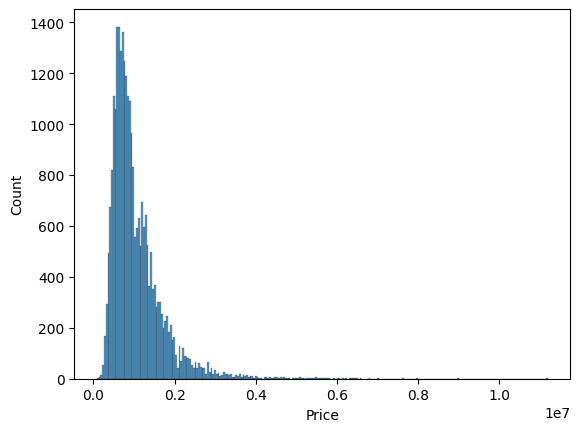

In [18]:
sns.histplot(main_df.Price);

Price correlation

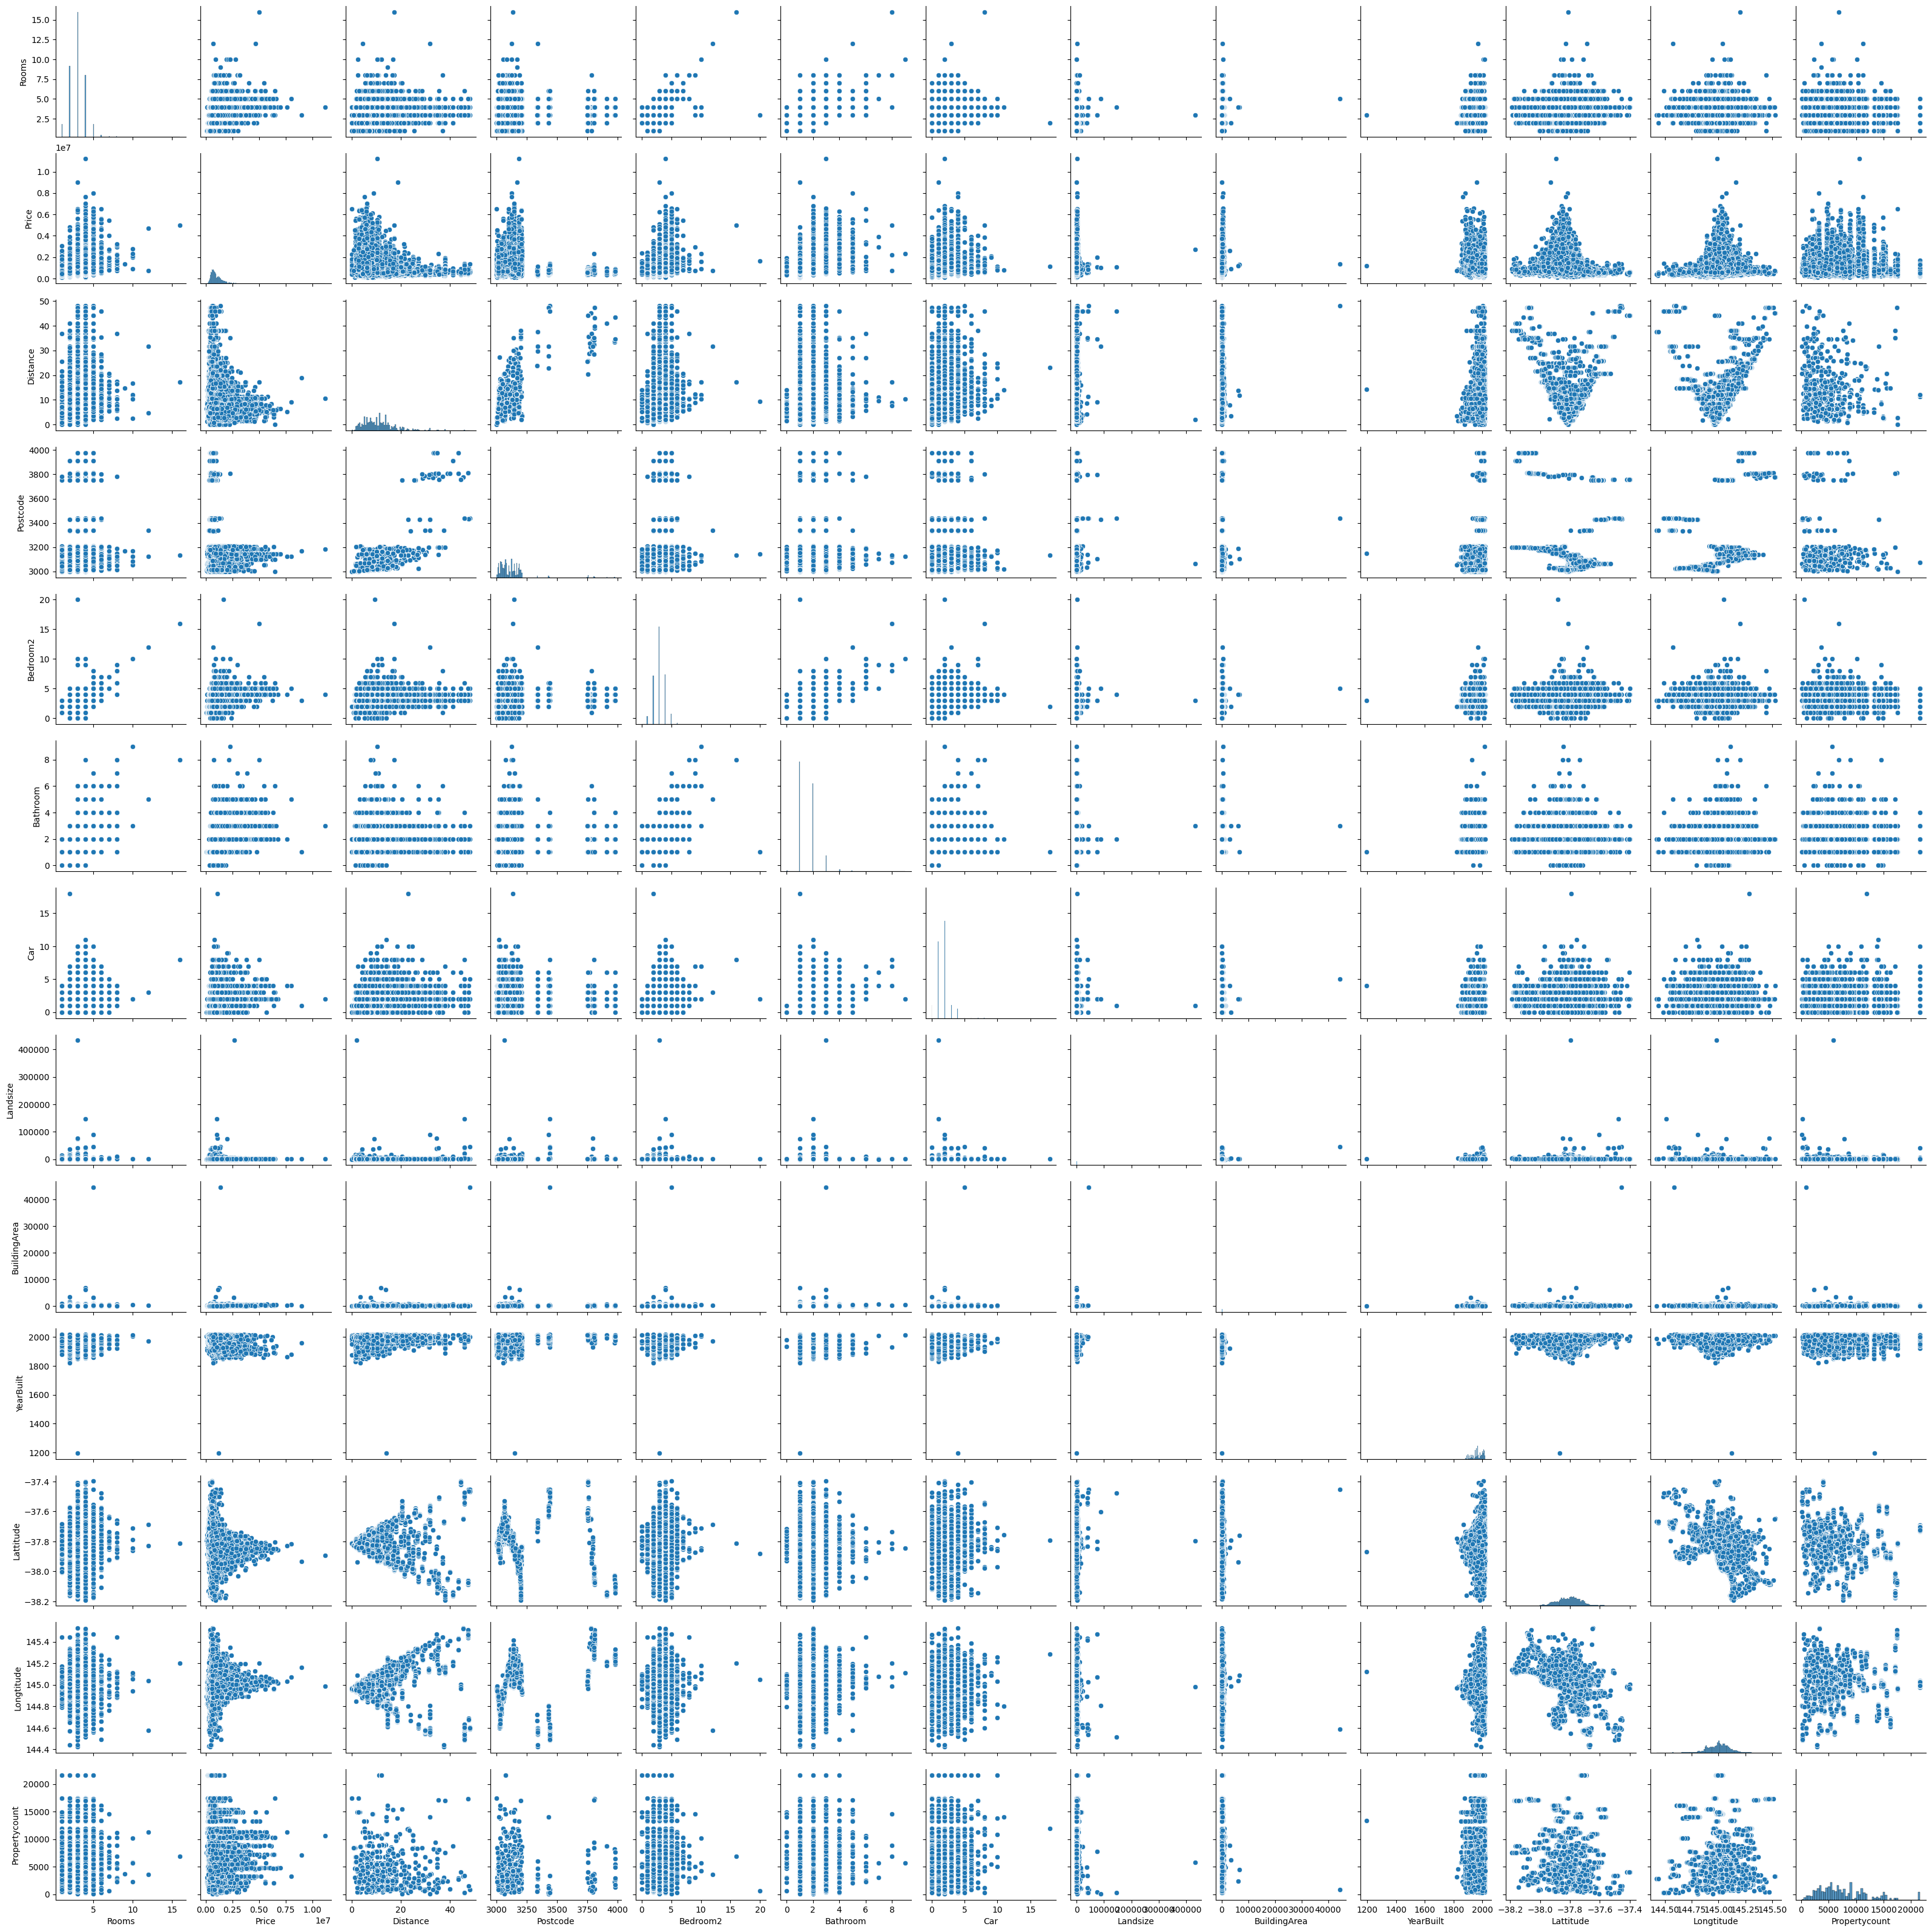

In [19]:
sns.pairplot(main_df.select_dtypes(exclude='object'));

Correlation heatmap

<ipython-input-20-e889eb20efdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_df.corr());


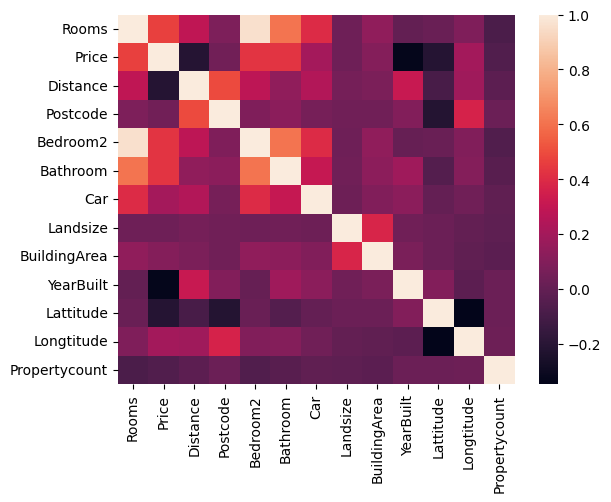

In [20]:
sns.heatmap(main_df.corr());

# Model Selection

Determine our x and y variables

In [21]:
X = main_df.copy()
y = X.pop("Price")

Split and preprocess data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_preprocessed = preprocess.fit_transform(X_train);
X_test_preprocessed = preprocess.transform(X_test);

Models definition

In [23]:
models = {
  'Lasso': {
  'model': Lasso()
  },
  'Linear': {
  'model': LinearRegression()
  },
  'Ridge': {
  'model': Ridge()
  },
  'ElasticNet': {
  'model': ElasticNet()
  },
  'KNeighbors': {
  'model': KNeighborsRegressor()
  },
  'RandomForest': {
  'model': RandomForestRegressor()
  },
  'GradientBoosting': {
  'model': GradientBoostingRegressor()
  },
  'AdaBoost': {
  'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  },
}

Training

In [24]:
for model in models:
  print(f'{model} is training...')

  models[model]['model'].fit(X_train_preprocessed, y_train)
  y_pred = models[model]['model'].predict(X_test_preprocessed)

  MAE = mean_absolute_error(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = mean_squared_error(y_test, y_pred, squared=False)
  R2 = r2_score(y_test, y_pred)

  print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')
  print('#' * 50)

  models[model]['MAE'] = MAE
  models[model]['MSE'] = MSE
  models[model]['RMSE'] = RMSE
  models[model]['R2'] = R2

Lasso is training...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876241723526195.4, tolerance: 841944086826.0586
  model = cd_fast.sparse_enet_coordinate_descent(


MAE: 249741.55521071286
MSE: 152269947050.08914
RMSE: 390217.8200058131
R2: 0.6284227094912735
##################################################
Linear is training...
MAE: 253756.5320051546
MSE: 154982171904.24997
RMSE: 393677.7513452468
R2: 0.6218041929547964
##################################################
Ridge is training...
MAE: 235468.3937870278
MSE: 138402577415.92996
RMSE: 372024.96880710835
R2: 0.6622626085322108
##################################################
ElasticNet is training...
MAE: 282731.6269544646
MSE: 205801779006.39395
RMSE: 453653.80964607134
R2: 0.49779146242221806
##################################################
KNeighbors is training...
MAE: 210663.97155020552
MSE: 127340061536.29988
RMSE: 356847.39250315377
R2: 0.6892579530266205
##################################################
RandomForest is training...
MAE: 163457.12987221428
MSE: 88627292488.08752
RMSE: 297703.3632461809
R2: 0.7837269280916277
##################################################
G

# Model Evaluation

Compare models

In [25]:
plot_df = pd.DataFrame({'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []})
for model in models:
  plot_df.loc[len(plot_df.index)] = [model, models[model]['MAE'], models[model]['MSE'], models[model]['RMSE'], models[model]['R2']]

Plotting metrics

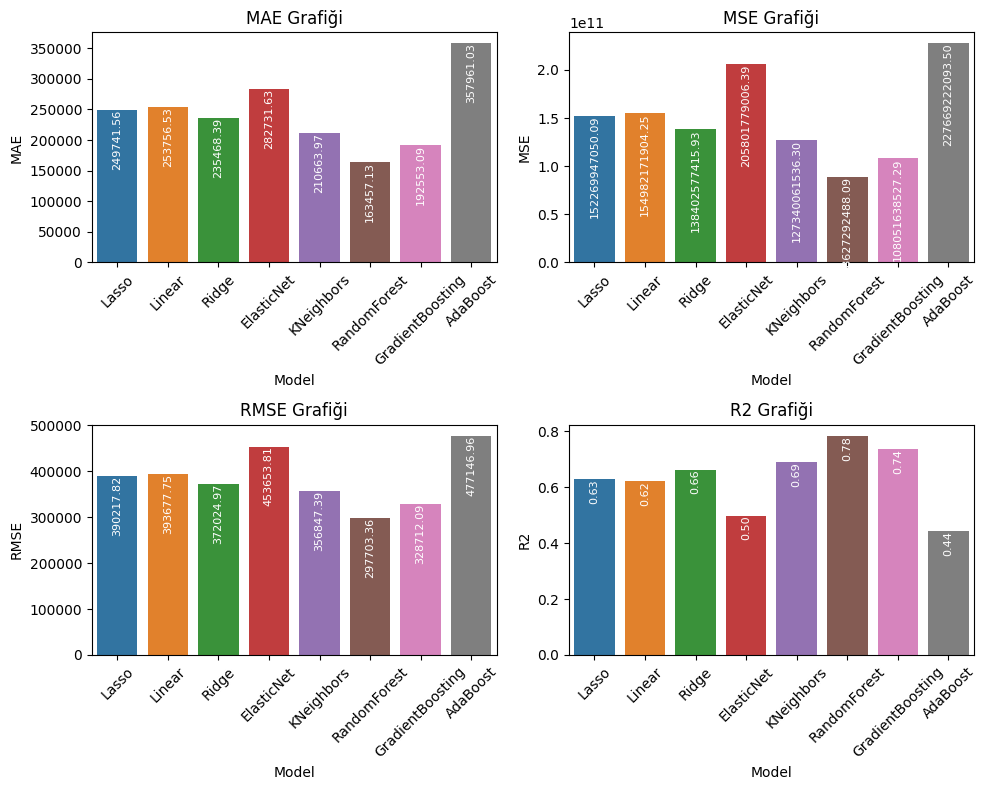

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

metrics = ['MAE',	'MSE',	'RMSE',	'R2']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.barplot(x='Model', y=metric, data=plot_df, ax=ax)
    ax.set_title(f'{metric} Grafiği')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_x() + p.get_width() / 2.
        ax.text(width, height, f'{height:.2f}', ha='center', va='top', rotation=90, fontsize=8, color='white')



plt.tight_layout()
plt.show()

Prediction with best model RandomForestRegressor with 0.78 R2 score

In [27]:
test_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [28]:
test_X = test_df.copy()
test_y = test_X.pop("Price")

In [29]:
test_X_preprocessed = preprocess.transform(test_X);

In [30]:
models['RandomForest']['model'].predict(test_X_preprocessed)

array([1070695.  , 1040585.  , 1898405.  , ..., 1016154.47, 2375450.  ,
        537227.  ])